In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pickle

## In this notebook we will compare our features selected purely by intuition and we will then use a more technical approach.

In [55]:
df = pd.read_csv("./data/df_for_ML.csv")

df.head()

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
2,2,0,0,2,2,1,1,0,1,1,0,1,0,1,0,1,0
3,0,1,0,2,0,1,1,1,1,0,1,1,0,1,0,1,0
4,0,1,0,2,1,0,0,1,0,1,0,0,1,1,0,0,1


## Machine Learning

### Elbow Method

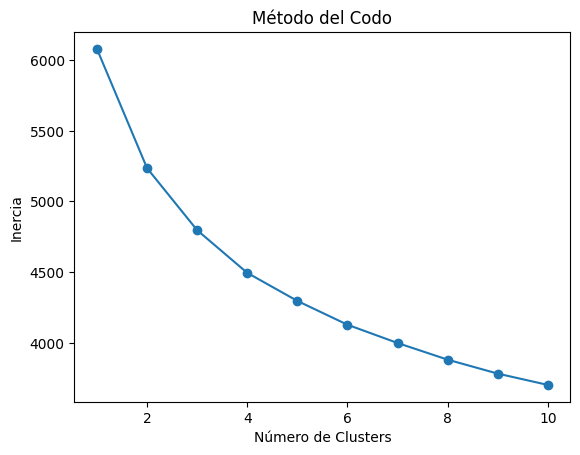

[0.57506361 0.79898219 0.56149279 1.10008482 0.66581849 0.51229856
 0.34435963 0.80661578 0.75487701 0.62256149 0.37743851 0.28244275
 0.71755725 0.64122137 0.35877863 0.78371501 0.21628499]


In [56]:
# Realizar el bucle para encontrar el número óptimo de clusters usando el método del codo
inertias = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)


# Graficar la curva del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters seleccionado por el método del codo
optimal_num_clusters = np.argmin(np.diff(inertias)) + 1
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans.fit(df)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los centroides
for centroid in centroids:
    print(centroid)

### Silhouette Score

The Silhouette Score is a metric used to evaluate the `quality` of clustering results. 
It provides a measure of how well each sample in a cluster is assigned to its own cluster compared to other clusters. 
The Silhouette Score can `range from -1 to 1`, where:

A score close to `+1` indicates that samples are `well-clustered`, with clear separation between clusters.

A score close to `0` indicates `overlapping clusters` or that samples are on or very close to the decision boundary between clusters.

A score close to `-1` indicates that samples may have been `assigned to the wrong clusters.`

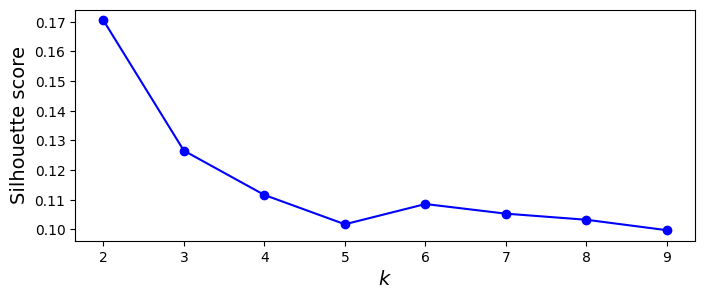

In [57]:

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df) for k in range(1,10)]

silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]]

silhouette_scores_cluster_2 = silhouette_scores[0]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [58]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<Axes: ylabel='count'>

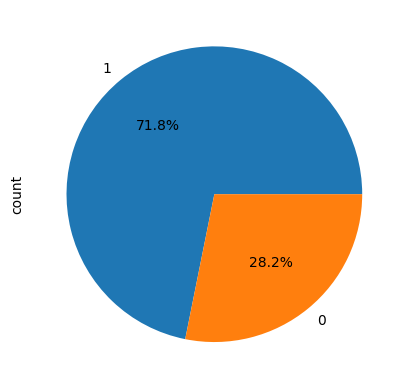

In [59]:
kmeans = KMeans(n_clusters = 2,n_init=10, random_state=42).fit(df)

df_graph = pd.DataFrame({"Data": kmeans.labels_})
df_graph["Data"].value_counts().plot.pie(autopct="%.1f%%")

In [60]:
# Here we can see the N number of centroids of each cluster
centers = kmeans.cluster_centers_

# Get column name
feature_names = df.columns

# Show centroids as df
cluster_centers_df = pd.DataFrame(centers, columns=feature_names)
cluster_centers_df

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,1.798193,1.033133,0.662651,1.078313,0.849398,0.620482,0.626506,0.831325,0.695783,0.376506,0.623494,0.307229,0.692771,0.569277,0.430723,0.813253,0.186747
1,0.095632,0.707202,0.521842,1.108619,0.593861,0.469894,0.233766,0.796930,0.778040,0.719008,0.280992,0.272727,0.727273,0.669421,0.330579,0.772137,0.227863


### ☹️ Since we are not happy with these results we are going to create an algorithm to find the best feature combination.

#### From optimal_features notebook we have found that the best combination of features are:

* Interests	
* WaterRecycling	
* GeneralRecycling	
* Meat	
* Garden_No	
* Garden_Yes	




In [61]:
optimal_df = df[['Interests', 'WaterRecycling',"GeneralRecycling","Meat","Garden_No","Garden_Yes"]]
optimal_df

,Interests,WaterRecycling,GeneralRecycling,Meat,Garden_No,Garden_Yes
0,0,1,0,1,1,0
1,0,1,1,1,0,1
2,2,1,1,0,1,0
3,0,1,1,1,1,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
1174,2,1,2,0,1,0
1175,1,0,1,1,1,0
1176,2,1,0,1,1,0
1177,2,1,1,1,1,0


In [80]:
optimal_df.to_csv(r'./data/df_ML_optimal.csv', index=False)

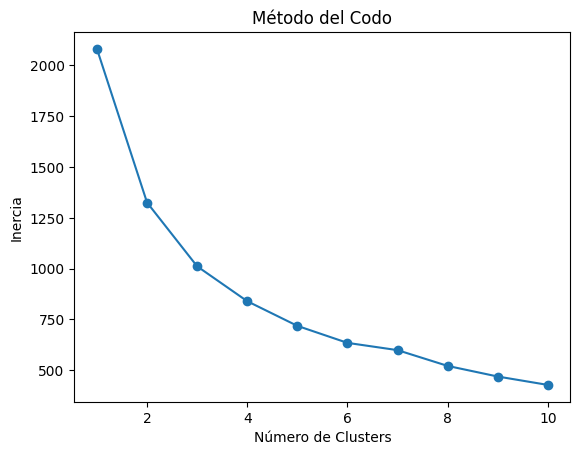

[0.57506361 0.51229856 0.34435963 0.80661578 0.78371501 0.21628499]


In [62]:
# Realizar el bucle para encontrar el número óptimo de clusters usando el método del codo
inertias = []

for n_clusters in range(1, 11):
    kmeans_optimal = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans_optimal.fit(optimal_df)
    inertias.append(kmeans_optimal.inertia_)


# Graficar la curva del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters seleccionado por el método del codo
optimal_num_clusters = np.argmin(np.diff(inertias)) + 1
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans_optimal.fit(optimal_df)

# Obtener los centroides de los clusters
centroids = kmeans_optimal.cluster_centers_

# Imprimir los centroides
for centroid in centroids:
    print(centroid)

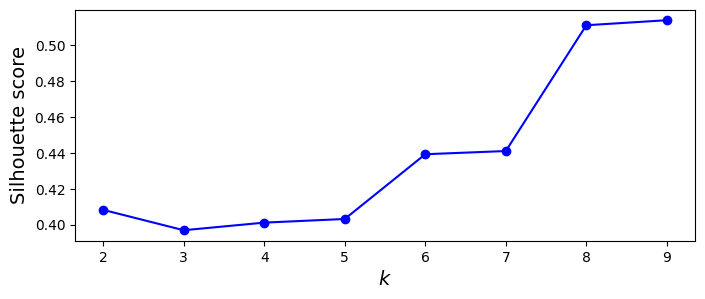

In [63]:
kmeans_optimal_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(optimal_df) for k in range(1,10)]

silhouette_scores = [silhouette_score(optimal_df, model.labels_) for model in kmeans_optimal_per_k[1:]]


silhouette_scores_optimal_cluster_2 = silhouette_scores[0]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [64]:
kmeans_optimal.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<Axes: ylabel='count'>

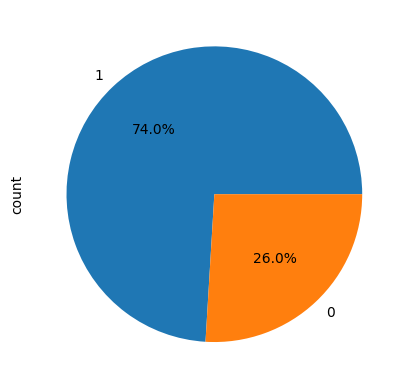

In [65]:
kmeans_optimal = KMeans(n_clusters = 2,n_init=10, random_state=42).fit(optimal_df)

optimal_df_graph = pd.DataFrame({"Data": kmeans_optimal.labels_})
optimal_df_graph["Data"].value_counts().plot.pie(autopct="%.1f%%")

## Now we can compare both model performance scores

In [66]:
# Here we can see the N number of centroids of each cluster
centers = kmeans_optimal.cluster_centers_

# Get column name
feature_names = optimal_df.columns

# Show centroids as optimal_df
cluster_centers_optimal_df = pd.DataFrame(centers, columns=feature_names)
cluster_centers_optimal_df

,Interests,WaterRecycling,GeneralRecycling,Meat,Garden_No,Garden_Yes
0,1.875817,0.611111,0.696078,0.843137,0.810458,0.189542
1,0.119129,0.477663,0.221077,0.793814,0.774341,0.225659


In [67]:
cluster_centers_df

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,1.798193,1.033133,0.662651,1.078313,0.849398,0.620482,0.626506,0.831325,0.695783,0.376506,0.623494,0.307229,0.692771,0.569277,0.430723,0.813253,0.186747
1,0.095632,0.707202,0.521842,1.108619,0.593861,0.469894,0.233766,0.796930,0.778040,0.719008,0.280992,0.272727,0.727273,0.669421,0.330579,0.772137,0.227863


## Model comparisons!

In [73]:
comparison_df_results = pd.DataFrame({
    'Model': ["Intuition", "Optimal"],
    'Inertia': [kmeans.inertia_, kmeans_optimal.inertia_],
    'Silhouette': [silhouette_scores_cluster_2, silhouette_scores_optimal_cluster_2],

})

comparison_df_results

,Model,Inertia,Silhouette
0,Intuition,5235.806230,0.170541
1,Optimal,1324.956472,0.408250


### Export in pickle optimal model

In [74]:
# Export the k-means model to a pickle file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_optimal, f)

In [76]:
# Read model
with open("kmeans_model.pkl", "rb") as archivo_entrada:
    pickle_kmeans_optimal = pickle.load(archivo_entrada)

In [78]:
pickle_kmeans_optimal

KMeans(n_clusters=2, n_init=10, random_state=42)

### Test our model

In [79]:
# Extract the values of the row into a NumPy array and transform to 2D  
sample_survey_0 = optimal_df.iloc[100].values.reshape(1, -1)
sample_survey_1 = optimal_df.iloc[0].values.reshape(1, -1)

# Print the row values
print(sample_survey_0)
print(sample_survey_1)


# Set sample as optimal_df to prevent error.
sample_survey_optimal_df_0 = pd.DataFrame(sample_survey_0, columns=feature_names)
sample_survey_optimal_df_1 = pd.DataFrame(sample_survey_1, columns=feature_names)

# Give me a prediction of 0
print(pickle_kmeans_optimal.predict(sample_survey_optimal_df_0))
# Give me a prediction of 1
print(pickle_kmeans_optimal.predict(sample_survey_optimal_df_1))

[[2 0 0 1 1 0]]
[[0 1 0 1 1 0]]
[0]
[1]
